## 1. Import the libraries:

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

## 2. Load the dataset:

In [2]:
data = pd.read_csv("Insurance claims data.csv")

In [3]:
data.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


## 3. EDA:

#### Let's get a quick information on different columns:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

#### Check if there is any null-values:

In [5]:
data.isna().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

#### There are no any null-values. Let's see the size of the dataset:

In [6]:
print(f"The shape of the data is: {data.shape}.\nSo, in total, there are: {data.shape[0]} rows "
      f"and {data.shape[1]} columns.")

The shape of the data is: (58592, 41).
So, in total, there are: 58592 rows and 41 columns.


#### Below, it summarizes the data-types of the data we have:

In [7]:
data.dtypes.value_counts()

object     28
int64      10
float64     3
dtype: int64

#### Our target column is claim_status, let's see the difference in the counts:

In [8]:
data.claim_status.value_counts()

0    54844
1     3748
Name: claim_status, dtype: int64

In [9]:
diff_count = data.claim_status.value_counts()[0] - data.claim_status.value_counts()[1]
print(f"The difference between the counts is: {diff_count}")

The difference between the counts is: 51096


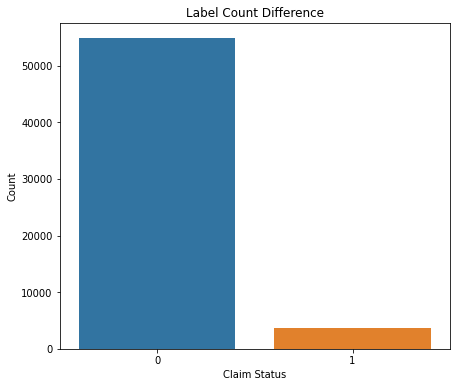

In [10]:
plt.figure(figsize=(7, 6))
sns.countplot(x=data.claim_status, data=data)
plt.title('Label Count Difference')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

#### Understaind the correlation:

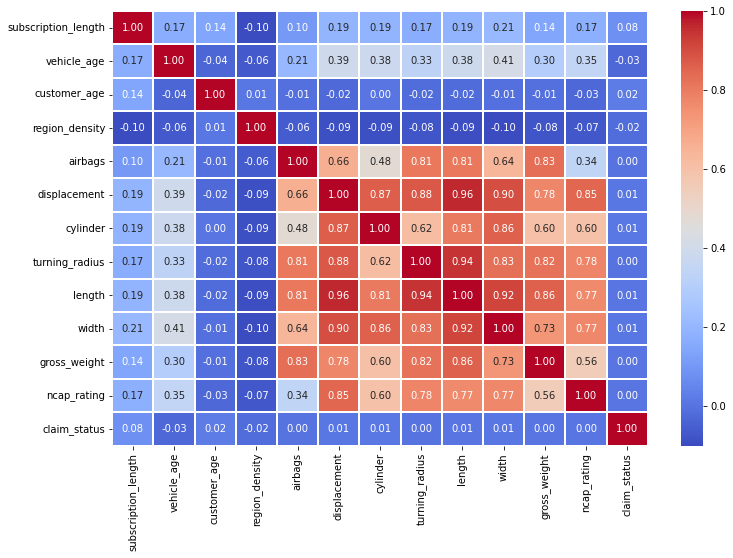

In [11]:
data_corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr, annot=True, linewidths=0.3, cmap='coolwarm', fmt='.2f')
plt.show()

It seems, subscription_length, vechicle_age, customer_age,and region_density are only correlated with the
claim_status. 

Let's see these features and try to understand their distribution.

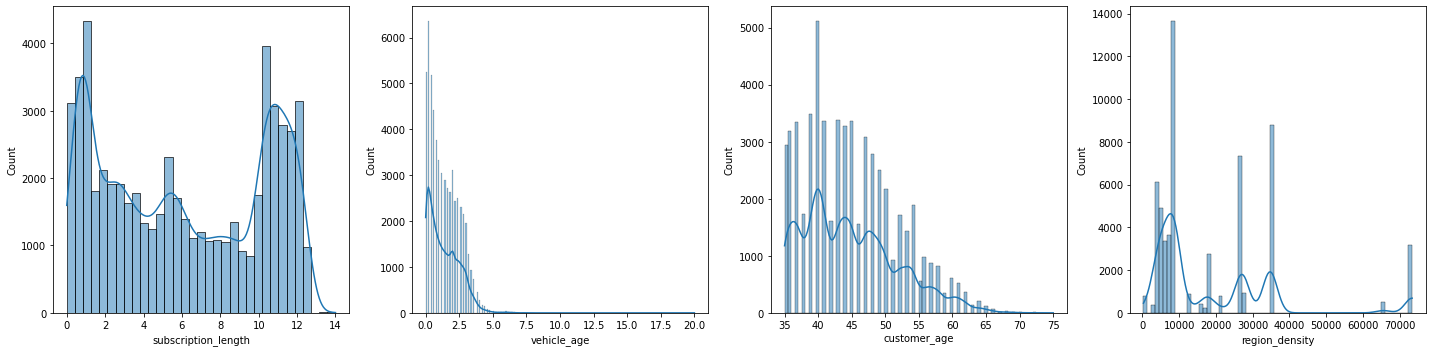

In [12]:
columns = ['subscription_length', 'vehicle_age', 'customer_age', 'region_density']

plt.figure(figsize=(20, 5))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 4, i)
    sns.histplot(data[col], kde=True)

plt.tight_layout()
plt.show()

**- Subscription_length:** Based on the distribution of the data, it seems the company did pretty well in acquiring the customers at the beginning, there are many peoples with subscription from 10 to 12 years and even few customers on 14 but in between there are some low counts from 2 till 10 years but again started gaining more customers as there is a huge spike from the 0 till 1.25 years.

**- Vehicle_age:** Most of the customers have new vehicle with the spikes in the distribution mostly around 0 to 3 years.

**- Customer_age:** Most of the customer seems to be middle ages from 35 to 50, which also makes sense since people at this age start being conscious aboung being insured.

**- region_density:** Seems like there is a huge variation in the density of population where people are insured.

##### The correlation is only calculated on the numerical features, now, let's look into some categorical features as well:

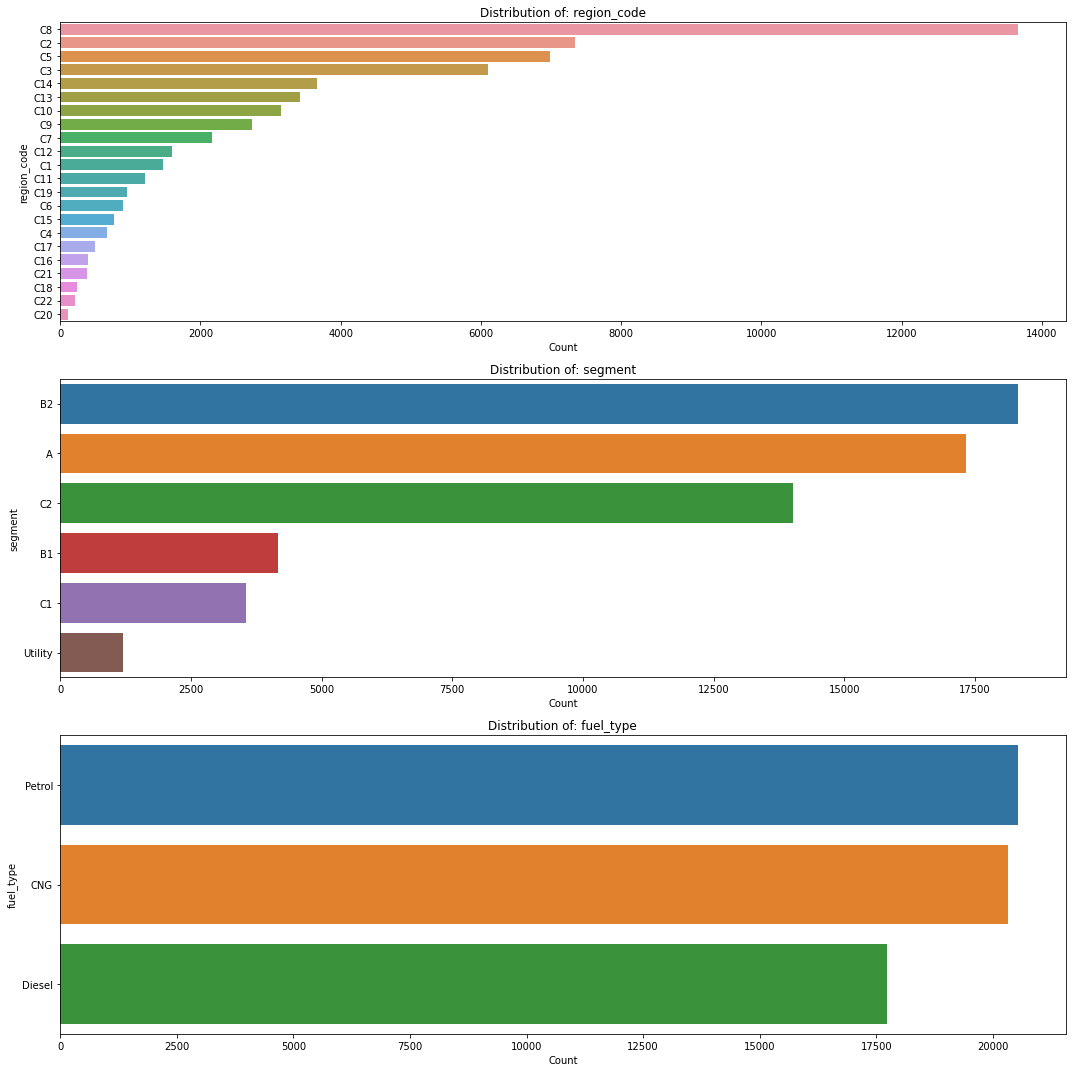

In [13]:
# Selecting relevant categorical columns:
categorical_cols = ['region_code', 'segment', 'fuel_type']

# Plotting the distribution of these columns:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_cols, 1):
    plt.subplot(3, 1, i)
    sns.countplot(y=column, data=data, order=data[column].value_counts().index)
    plt.title(f"Distribution of: {column}")
    plt.xlabel("Count")
    plt.ylabel(column)
    
plt.tight_layout()
plt.show()

- There are wide varieties of region_code, but 'C8' seems to be the one which is dominant followed by 'C2', 'C5', and 'C3'.

- In the segment distribution, there are few categories, with 'B2' segment being the most common, followed by 'A', and 'C2'.

- In the fuel type, petrol is the one with highest count compared to CNG(Compressed Natural Gas) and Diesel.

##### By now we have completed our EDA (Expolratory Data Analysis), now we will start handling the class imbalance problem.

## 4. Handling Class Imbalance:

As, we know there is a huge difference in our target class which is claim_status, where 0 means not claimed
and 1 means claimed.

In [14]:
data['claim_status'].value_counts()

0    54844
1     3748
Name: claim_status, dtype: int64

Separate the majority and minority class:

In [15]:
majority = data[data['claim_status'] == 0]
minority = data[data['claim_status'] == 1]

One of the ways to handle the class imbalance is to oversample the minority class i.e. we increase these minority
class such that it will matchup the counts of the majority class.

In [16]:
# Over-sample the minority class:
minority_oversampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
minority_oversampled.shape

(54844, 41)

As we can see the shape of the over-sampled data, now it sample size matches with the sample size of the majority.

In [17]:
# Concat the data over-sampled and majority data:

oversampled_data = pd.concat([minority_oversampled, majority])
oversampled_data.shape

(109688, 41)

In [33]:
oversampled_data.claim_status.value_counts()

1    54844
0    54844
Name: claim_status, dtype: int64

In [34]:
oversampled_data = oversampled_data.reset_index(drop=True)

Now, the sample size for both the labels matches each other.

Let's visualize important features of this new over-sampled data . Let's plot the distribution of those 4 features that we did earlier:

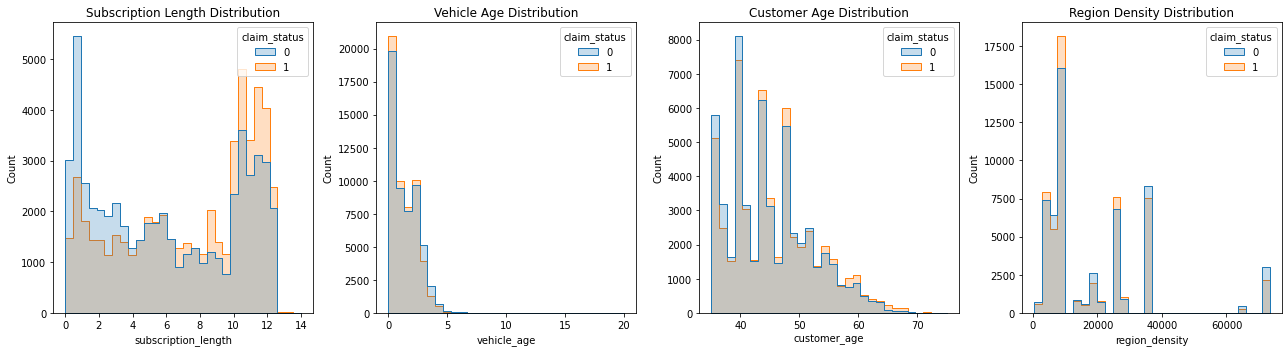

In [37]:
plt.figure(figsize=(18, 5))

# 1. subscription_length:
plt.subplot(1, 4, 1)
sns.histplot(data=oversampled_data, x='subscription_length', hue='claim_status', element='step', bins=30)
plt.title("Subscription Length Distribution")

# 2. vehicle_age:
plt.subplot(1, 4, 2)
sns.histplot(data=oversampled_data, x='vehicle_age', hue='claim_status', element='step', bins=30)
plt.title("Vehicle Age Distribution")

# 3. customer_age:
plt.subplot(1, 4, 3)
sns.histplot(data=oversampled_data, x='customer_age', hue='claim_status', element='step', bins=30)
plt.title("Customer Age Distribution")

sns.histplot

# 4. region_density:
plt.subplot(1, 4, 4)
sns.histplot(data=oversampled_data, x='region_density', hue='claim_status', element='step', bins=30)
plt.title("Region Density Distribution")

plt.tight_layout()
plt.show()

The visualization of the distribution looks good and the data does seems like the original ones although we had oversampled them.

<hr> 



## 5. Feature Extraction:

Now, since the label counts are matched and there is no any domination, we will now extract the features that are relevant to the target class i.e. claim_status and then build a model on those features.

Here we will be using Random Forest's feature_importances_ method to pull out top 10 features that is most relevant to the target class and later use them to build the model.

But our data is composed of different data types and one of them is object which means text or string and we cannot feed it directly to the model. It needs to be enocded in some numerical form. So, first we will be encoding text into numerical form. And same needs to be done to the integer or float columns because the values are quite different in magnitude because column with high magnitude will dominate the other columns whose value is small.


**Although we will be building Random Forest which is a tree based model and can handle data of different scales, its better to scale them.**

#### 5.1 Standardizing data:

In [54]:
numerical_features = oversampled_data.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
normalized_numerical_features = scaler.fit_transform(numerical_features)

oversampled_data[numerical_features.columns] = normalized_numerical_features

In [56]:
oversampled_data.head(3)

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL055973,0.887634,-0.483588,0.979763,C8,-0.556608,Utility,M10,CNG,85Nm@3000rpm,...,No,No,No,No,No,No,No,Yes,-1.272678,1.0
1,POL044201,1.403284,0.243480,0.411046,C3,-0.834368,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.167281,1.0
2,POL052139,0.863080,0.607014,0.695404,C8,-0.556608,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,0.887260,1.0


#### 5.2 Encoding Categorical Data:

For categorical data the approach is a bit different, we have to pass one column at a time.

In [61]:
categorical_features = oversampled_data.select_dtypes(include=['object'])

label_encoder = LabelEncoder()

for col in categorical_features.columns:
    oversampled_data[col] = label_encoder.fit_transform(oversampled_data[col])

In [64]:
oversampled_data.columns

Index(['policy_id', 'subscription_length', 'vehicle_age', 'customer_age',
       'region_code', 'region_density', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'steering_type', 'turning_radius', 'length',
       'width', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'claim_status'],
      dtype='object')

#### 5.3 Split the data and create the model:

In [67]:
X = oversampled_data.iloc[:, 0:-1].values
y = oversampled_data.iloc[:, -1].values


random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X, y)

RandomForestClassifier(random_state=42)

In [76]:
top_10_imp_feature_index = np.argsort(random_forest.feature_importances_)[::-1][:10]

In [77]:
top_10_imp_feature_index

array([ 0,  1,  3,  2,  4,  5,  7, 24, 11,  6], dtype=int64)

In [82]:
feature_names = oversampled_data.columns[:-1]
top_10_feature_names = [feature_names[i] for i in top_10_imp_feature_index]
top_10_feature_imp_val = [random_forest.feature_importances_[i] for i in top_10_imp_feature_index]

In [86]:
top_10_features_df = pd.DataFrame({'Features':top_10_feature_names, 'Importance':top_10_feature_imp_val})

In [87]:
top_10_features_df

,Features,Importance
0,policy_id,0.264000
1,subscription_length,0.255674
2,customer_age,0.168848
3,vehicle_age,0.162020
4,region_code,0.063594
5,region_density,0.063081
6,model,0.002427
7,length,0.001566
8,engine_type,0.001446
9,segment,0.001415


These variables seem to have the greatest impact on the probability of an insurance claim. However, it's worth noting that the policy_id variable shows unusually high importance, which may not be logically connected to the prediction outcome. Therefore, we should ensure that the policy_id column is excluded during model training.